In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

from skluc.main.utils import logger

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.expand_frame_repr', False)

2019-01-14 08:52:56,179 [32318] DEBUG    matplotlib.backends: backend module://ipykernel.pylab.backend_inline version unknown


In [8]:
def build_df(dirname, filename):
    filepath = os.path.join(dirname, filename)
    df = pd.read_csv(filepath)
    df = df.apply(pd.to_numeric, errors="ignore")
    df = df.drop_duplicates()
    col_to_delete = ['--batch-size', '--chi-square-PD-kernel', '--chi-square-kernel',
       '--cifar10', '--cifar100', '--exp-chi-square-kernel',
       '--intercept-constant', '--laplacian-kernel', '--linear-kernel',
       '--mnist', '--quiet', '--rbf-kernel',
       '--sigmoid-kernel',  '--svhn',
       '--tensorboard', '--validation-size', "--out-dim", 
       'deepfriedconvnet', 'deepstrom','dense', "--nb-stack", 
                     "--non-linear", "--non-linearity", "--num-epoch", "--seed",
                     "--train-size", "--second-layer-size", "activation_function",
                     "deepstrom_activation", "--real-fastfood", "--real-nystrom"
            ]
    for c in col_to_delete:
        df = df.drop([c], axis=1)
    return df


In [9]:
DIRNAME = "/home/luc/PycharmProjects/deepstrom_network/results/2019-01/classif_end_to_end_deepstrom_mnist_svhn/"
FILENAME = "gathered_results.csv"
df = build_df(DIRNAME, FILENAME)

In [10]:
df

--dropout --gamma  --learning-rate  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
0         1.0     1.0           0.0001          16              False   mnist       rbf  deepstrom  0.932692        0.252535   2024.045805          None  0.923778       0.322065      1546908020
1         1.0    None           0.0001           8              False   mnist    linear  deepstrom  0.933093        0.259802   2201.852409          None  0.925781       0.339634      1546879316
2         1.0     1.0           0.0001         128              False   mnist       rbf  deepstrom  0.965645        0.240070   1816.051002          None  0.965645       0.336579      1546911974
3         1.0     0.1           0.0001          16              False    svhn       rbf  deepstrom  0.955934        5.461280  10331.340425          None  0.948818       2.904871      1546888895
4         1.0    0.01           0.0001         128              False    svhn       rbf  deepstrom  0.958397       24.160543  35589.360986          None  0.951222      10.303744      1546901556
5         1.0    None           0.0001          64              False    svhn  chi2_cpd  deepstrom  0.959052        6.683464  11643.067578          None  0.952724       3.424270      1546872323
6         1.0     1.0           0.0001          32              False   mnist       rbf  deepstrom  0.961238        0.261577   2010.837394          None  0.956230       0.328674      1546910060
7         1.0    None           0.0001          32              False   mnist    linear  deepstrom  0.960637        0.259691   2219.141911          None  0.956230       0.354580      1546884007
8         1.0    None           0.0001          64              False    svhn    linear  deepstrom  0.960899       19.890793  30285.921654          None  0.953626       8.645441      1546871217
9         1.0    None           0.0001          32              False    svhn  chi2_cpd  deepstrom  0.954126       18.052246  28334.161427          None  0.955929       7.939363      1546869469
10        1.0     0.1           0.0001         128              False    svhn       rbf  deepstrom  0.916564       22.530888  36388.595408          None  0.915465       9.922997      1546901812
11        1.0     0.1           0.0001         128              False   mnist       rbf  deepstrom  0.974559        0.241471   1981.380245          None  0.974058       0.335224      1546911754
12        1.0    None           0.0001          64              False   mnist  chi2_cpd  deepstrom  0.946014        0.344865   2279.829829          None  0.941707       0.434396      1546886237
13        1.0    None           0.0001          16              False   mnist    linear  deepstrom  0.955929        0.461002   3989.239658          None  0.946214       0.616996      1546882824
14        1.0     1.0           0.0001          64              False    svhn       rbf  deepstrom  0.960630        6.689327  11333.091964          None  0.955429       3.374647      1546900611
15        1.0     1.0           0.0001          16              False    svhn       rbf  deepstrom  0.959244       15.812295  28163.243256          None  0.951623       7.331094      1546890774
16        1.0     1.0           0.0001          32              False    svhn       rbf  deepstrom  0.960784        6.318614  10157.971171          None  0.955529       3.223544      1546898356
17        1.0    None           0.0001         128              False   mnist    linear  deepstrom  0.967248        0.466803   3918.996891          None  0.963141       0.607650      1546886839
18        1.0    0.01           0.0001          16              False    svhn       rbf  deepstrom  0.961977        5.679724  10372.074990          None  0.954527       3.128531      1546888529
19        1.0    0.01           0.0001           8              False   mnist       rbf  deepstrom  0.896835        0.260317

In [14]:
def get_sorted_acc_for_dataset(df_, name):
    df_dataset = df_[df_["dataset"] == name]
    df_dataset = df_dataset.sort_values(by="val_acc", ascending=False)
    return df_dataset

In [15]:
get_sorted_acc_for_dataset(df, "svhn")

--dropout --gamma  --learning-rate  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
9         1.0    None           0.0001          32              False    svhn  chi2_cpd  deepstrom  0.954126       18.052246  28334.161427          None  0.955929       7.939363      1546869469
16        1.0     1.0           0.0001          32              False    svhn       rbf  deepstrom  0.960784        6.318614  10157.971171          None  0.955529       3.223544      1546898356
20        1.0     0.1           0.0001          64              False    svhn       rbf  deepstrom  0.958667        6.654502  11347.596826          None  0.955529       3.359311      1546899262
14        1.0     1.0           0.0001          64              False    svhn       rbf  deepstrom  0.960630        6.689327  11333.091964          None  0.955429       3.374647      1546900611
18        1.0    0.01           0.0001          16              False    svhn       rbf  deepstrom  0.961977        5.679724  10372.074990          None  0.954527       3.128531      1546888529
8         1.0    None           0.0001          64              False    svhn    linear  deepstrom  0.960899       19.890793  30285.921654          None  0.953626       8.645441      1546871217
36        1.0    None           0.0001          32              False    svhn    linear  deepstrom  0.959975        6.618528  11235.954292          None  0.953325       3.442897      1546862670
33        1.0    None           0.0001         128              False    svhn  chi2_cpd  deepstrom  0.961861       22.435498  35680.061890          None  0.953025       9.247979      1546876745
45        1.0    None           0.0001          16              False    svhn  chi2_cpd  deepstrom  0.960360        5.627460  10016.207254          None  0.952825       2.989114      1546862280
5         1.0    None           0.0001          64              False    svhn  chi2_cpd  deepstrom  0.959052        6.683464  11643.067578          None  0.952724       3.424270      1546872323
42        1.0     1.0           0.0001         128              False    svhn       rbf  deepstrom  0.960899       22.367601  36241.420053          None  0.952624       9.891239      1546903291
21        1.0    None           0.0001          16              False    svhn    linear  deepstrom  0.957320        5.595378   9988.811031          None  0.951723       2.966331      1546858024
15        1.0     1.0           0.0001          16              False    svhn       rbf  deepstrom  0.959244       15.812295  28163.243256          None  0.951623       7.331094      1546890774
4         1.0    0.01           0.0001         128              False    svhn       rbf  deepstrom  0.958397       24.160543  35589.360986          None  0.951222      10.303744      1546901556
34        1.0    0.01           0.0001          64              False    svhn       rbf  deepstrom  0.956050        6.721881  11540.955498          None  0.949720       3.383279      1546898931
30        1.0     0.1           0.0001          32              False    svhn       rbf  deepstrom  0.954318       18.071717  28260.571261          None  0.949119       7.972501      1546897853
3         1.0     0.1           0.0001          16              False    svhn       rbf  deepstrom  0.955934        5.461280  10331.340425          None  0.948818       2.904871      1546888895
48        1.0    None           0.0001         128              False    svhn    linear  deepstrom  0.957743        9.224733  13444.991807          None  0.947917       4.315006      1546873941
44        1.0    0.01           0.0001          32              False    svhn       rbf  deepstrom  0.957012        6.295136  10653.076691          None  0.947616       3.291426      1546892635
41        1.0     1.0           0.0001           8              False    svhn       rbf  deepstrom  0.953087        5.212112

In [16]:
get_sorted_acc_for_dataset(df, "mnist")

--dropout --gamma  --learning-rate  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time   train_time training_time   val_acc  val_eval_time  file_timestamp
11        1.0     0.1           0.0001         128              False   mnist       rbf  deepstrom  0.974559        0.241471  1981.380245          None  0.974058       0.335224      1546911754
49        1.0    None           0.0001          64              False   mnist    linear  deepstrom  0.968950        0.261086  2212.805966          None  0.966346       0.362798      1546886056
2         1.0     1.0           0.0001         128              False   mnist       rbf  deepstrom  0.965645        0.240070  1816.051002          None  0.965645       0.336579      1546911974
17        1.0    None           0.0001         128              False   mnist    linear  deepstrom  0.967248        0.466803  3918.996891          None  0.963141       0.607650      1546886839
40        1.0    None           0.0001         128              False   mnist  chi2_cpd  deepstrom  0.966546        0.282023  1990.206887          None  0.962340       0.371962      1546886894
25        1.0     1.0           0.0001          64              False   mnist       rbf  deepstrom  0.962640        0.258569  1906.477137          None  0.959034       0.354456      1546910639
47        1.0     0.1           0.0001          64              False   mnist       rbf  deepstrom  0.960337        0.254434  2203.429977          None  0.958133       0.350430      1546910502
7         1.0    None           0.0001          32              False   mnist    linear  deepstrom  0.960637        0.259691  2219.141911          None  0.956230       0.354580      1546884007
6         1.0     1.0           0.0001          32              False   mnist       rbf  deepstrom  0.961238        0.261577  2010.837394          None  0.956230       0.328674      1546910060
27        1.0     0.1           0.0001          32              False   mnist       rbf  deepstrom  0.964443        0.250631  2231.617918          None  0.955729       0.353331      1546909511
46        1.0     0.1           0.0001          16              False   mnist       rbf  deepstrom  0.958734        0.257728  2236.980130          None  0.953325       0.365693      1546907983
32        1.0    None           0.0001          32              False   mnist  chi2_cpd  deepstrom  0.957833        0.253876  1928.256024          None  0.953125       0.365236      1546884954
29        1.0    0.01           0.0001          32              False   mnist       rbf  deepstrom  0.957632        0.257573  2220.922925          None  0.951522       0.352504      1546908554
22        1.0    None           0.0001          16              False   mnist  chi2_cpd  deepstrom  0.959335        0.254009  2242.645634          None  0.951322       0.364692      1546883789
13        1.0    None           0.0001          16              False   mnist    linear  deepstrom  0.955929        0.461002  3989.239658          None  0.946214       0.616996      1546882824
43        1.0    0.01           0.0001          16              False   mnist       rbf  deepstrom  0.944912        0.252544  2221.394845          None  0.944812       0.351738      1546907174
35        1.0     1.0           0.0001           8              False   mnist       rbf  deepstrom  0.946915        0.263798  2229.708116          None  0.942408       0.368061      1546905743
12        1.0    None           0.0001          64              False   mnist  chi2_cpd  deepstrom  0.946014        0.344865  2279.829829          None  0.941707       0.434396      1546886237
1         1.0    None           0.0001           8              False   mnist    linear  deepstrom  0.933093        0.259802  2201.852409          None  0.925781       0.339634      1546879316
0         1.0     1.0           0.0001          16              False   mnist       rbf  deepstrom  0.932692        0.252535  2024.045805       

In [17]:
sorted_ = get_sorted_acc_for_dataset(df, "mnist")
for k in ["rbf", "linear", "chi2_cpd"]:
    sorted_k = sorted_[sorted_["kernel"] == k]
    print(k)
    display(sorted_k)

rbf


--dropout --gamma  --learning-rate  --nys-size  --tanh-activation dataset kernel    network  test_acc  test_eval_time   train_time training_time   val_acc  val_eval_time  file_timestamp
11        1.0     0.1           0.0001         128              False   mnist    rbf  deepstrom  0.974559        0.241471  1981.380245          None  0.974058       0.335224      1546911754
2         1.0     1.0           0.0001         128              False   mnist    rbf  deepstrom  0.965645        0.240070  1816.051002          None  0.965645       0.336579      1546911974
25        1.0     1.0           0.0001          64              False   mnist    rbf  deepstrom  0.962640        0.258569  1906.477137          None  0.959034       0.354456      1546910639
47        1.0     0.1           0.0001          64              False   mnist    rbf  deepstrom  0.960337        0.254434  2203.429977          None  0.958133       0.350430      1546910502
6         1.0     1.0           0.0001          32              False   mnist    rbf  deepstrom  0.961238        0.261577  2010.837394          None  0.956230       0.328674      1546910060
27        1.0     0.1           0.0001          32              False   mnist    rbf  deepstrom  0.964443        0.250631  2231.617918          None  0.955729       0.353331      1546909511
46        1.0     0.1           0.0001          16              False   mnist    rbf  deepstrom  0.958734        0.257728  2236.980130          None  0.953325       0.365693      1546907983
29        1.0    0.01           0.0001          32              False   mnist    rbf  deepstrom  0.957632        0.257573  2220.922925          None  0.951522       0.352504      1546908554
43        1.0    0.01           0.0001          16              False   mnist    rbf  deepstrom  0.944912        0.252544  2221.394845          None  0.944812       0.351738      1546907174
35        1.0     1.0           0.0001           8              False   mnist    rbf  deepstrom  0.946915        0.263798  2229.708116          None  0.942408       0.368061      1546905743
0         1.0     1.0           0.0001          16              False   mnist    rbf  deepstrom  0.932692        0.252535  2024.045805          None  0.923778       0.322065      1546908020
37        1.0     0.1           0.0001           8              False   mnist    rbf  deepstrom  0.919772        0.254121  2214.954805          None  0.913562       0.379605      1546904948
19        1.0    0.01           0.0001           8              False   mnist    rbf  deepstrom  0.896835        0.260317  2402.729009          None  0.880509       0.365236      1546903318
38        1.0    0.01           0.0001         128              False   mnist    rbf  deepstrom  0.840144        0.244696  2156.620541          None  0.845353       0.339866      1546910786
26        1.0    0.01           0.0001          64              False   mnist    rbf  deepstrom  0.738181        0.252228  2217.483448          None  0.740184       0.362291      1546910231

linear


--dropout --gamma  --learning-rate  --nys-size  --tanh-activation dataset  kernel    network  test_acc  test_eval_time   train_time training_time   val_acc  val_eval_time  file_timestamp
49        1.0    None           0.0001          64              False   mnist  linear  deepstrom  0.968950        0.261086  2212.805966          None  0.966346       0.362798      1546886056
17        1.0    None           0.0001         128              False   mnist  linear  deepstrom  0.967248        0.466803  3918.996891          None  0.963141       0.607650      1546886839
7         1.0    None           0.0001          32              False   mnist  linear  deepstrom  0.960637        0.259691  2219.141911          None  0.956230       0.354580      1546884007
13        1.0    None           0.0001          16              False   mnist  linear  deepstrom  0.955929        0.461002  3989.239658          None  0.946214       0.616996      1546882824
1         1.0    None           0.0001           8              False   mnist  linear  deepstrom  0.933093        0.259802  2201.852409          None  0.925781       0.339634      1546879316

chi2_cpd


--dropout --gamma  --learning-rate  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time   train_time training_time   val_acc  val_eval_time  file_timestamp
40        1.0    None           0.0001         128              False   mnist  chi2_cpd  deepstrom  0.966546        0.282023  1990.206887          None  0.962340       0.371962      1546886894
32        1.0    None           0.0001          32              False   mnist  chi2_cpd  deepstrom  0.957833        0.253876  1928.256024          None  0.953125       0.365236      1546884954
22        1.0    None           0.0001          16              False   mnist  chi2_cpd  deepstrom  0.959335        0.254009  2242.645634          None  0.951322       0.364692      1546883789
12        1.0    None           0.0001          64              False   mnist  chi2_cpd  deepstrom  0.946014        0.344865  2279.829829          None  0.941707       0.434396      1546886237
39        1.0    None           0.0001           8              False   mnist  chi2_cpd  deepstrom  0.925681        0.266789  2238.982206          None  0.914764       0.354837      1546881539

In [18]:
sorted_ = get_sorted_acc_for_dataset(df, "svhn")
for k in ["rbf", "linear", "chi2_cpd"]:
    sorted_k = sorted_[sorted_["kernel"] == k]
    print(k)
    display(sorted_k)

rbf


--dropout --gamma  --learning-rate  --nys-size  --tanh-activation dataset kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
16        1.0     1.0           0.0001          32              False    svhn    rbf  deepstrom  0.960784        6.318614  10157.971171          None  0.955529       3.223544      1546898356
20        1.0     0.1           0.0001          64              False    svhn    rbf  deepstrom  0.958667        6.654502  11347.596826          None  0.955529       3.359311      1546899262
14        1.0     1.0           0.0001          64              False    svhn    rbf  deepstrom  0.960630        6.689327  11333.091964          None  0.955429       3.374647      1546900611
18        1.0    0.01           0.0001          16              False    svhn    rbf  deepstrom  0.961977        5.679724  10372.074990          None  0.954527       3.128531      1546888529
42        1.0     1.0           0.0001         128              False    svhn    rbf  deepstrom  0.960899       22.367601  36241.420053          None  0.952624       9.891239      1546903291
15        1.0     1.0           0.0001          16              False    svhn    rbf  deepstrom  0.959244       15.812295  28163.243256          None  0.951623       7.331094      1546890774
4         1.0    0.01           0.0001         128              False    svhn    rbf  deepstrom  0.958397       24.160543  35589.360986          None  0.951222      10.303744      1546901556
34        1.0    0.01           0.0001          64              False    svhn    rbf  deepstrom  0.956050        6.721881  11540.955498          None  0.949720       3.383279      1546898931
30        1.0     0.1           0.0001          32              False    svhn    rbf  deepstrom  0.954318       18.071717  28260.571261          None  0.949119       7.972501      1546897853
3         1.0     0.1           0.0001          16              False    svhn    rbf  deepstrom  0.955934        5.461280  10331.340425          None  0.948818       2.904871      1546888895
44        1.0    0.01           0.0001          32              False    svhn    rbf  deepstrom  0.957012        6.295136  10653.076691          None  0.947616       3.291426      1546892635
41        1.0     1.0           0.0001           8              False    svhn    rbf  deepstrom  0.953087        5.212112  10043.662392          None  0.946314       2.831870      1546888286
23        1.0    0.01           0.0001           8              False    svhn    rbf  deepstrom  0.930534        6.693204  17501.385925          None  0.929287       3.207332      1546887418
10        1.0     0.1           0.0001         128              False    svhn    rbf  deepstrom  0.916564       22.530888  36388.595408          None  0.915465       9.922997      1546901812
28        1.0     0.1           0.0001           8              False    svhn    rbf  deepstrom  0.785560       18.098577  31956.024072          None  0.795974       7.654009      1546888195

linear


--dropout --gamma  --learning-rate  --nys-size  --tanh-activation dataset  kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
8         1.0    None           0.0001          64              False    svhn  linear  deepstrom  0.960899       19.890793  30285.921654          None  0.953626       8.645441      1546871217
36        1.0    None           0.0001          32              False    svhn  linear  deepstrom  0.959975        6.618528  11235.954292          None  0.953325       3.442897      1546862670
21        1.0    None           0.0001          16              False    svhn  linear  deepstrom  0.957320        5.595378   9988.811031          None  0.951723       2.966331      1546858024
48        1.0    None           0.0001         128              False    svhn  linear  deepstrom  0.957743        9.224733  13444.991807          None  0.947917       4.315006      1546873941
31        1.0    None           0.0001           8              False    svhn  linear  deepstrom  0.949007       15.214779  27283.960559          None  0.942909       7.100276      1546855490

chi2_cpd


--dropout --gamma  --learning-rate  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
9         1.0    None           0.0001          32              False    svhn  chi2_cpd  deepstrom  0.954126       18.052246  28334.161427          None  0.955929       7.939363      1546869469
33        1.0    None           0.0001         128              False    svhn  chi2_cpd  deepstrom  0.961861       22.435498  35680.061890          None  0.953025       9.247979      1546876745
45        1.0    None           0.0001          16              False    svhn  chi2_cpd  deepstrom  0.960360        5.627460  10016.207254          None  0.952825       2.989114      1546862280
5         1.0    None           0.0001          64              False    svhn  chi2_cpd  deepstrom  0.959052        6.683464  11643.067578          None  0.952724       3.424270      1546872323
24        1.0    None           0.0001           8              False    svhn  chi2_cpd  deepstrom  0.943619       17.961498  31762.350274          None  0.945413       7.654264      1546856377

In [16]:
method_names = set(df["network"].values)
kernel_names = set(df["kernel"].values)
nys_size = set(df["--nys-size"].values)
gamma_values = set(df["--gamma"].values)
gamma_values.remove("None")
datasets = set(df["dataset"].values)

logger.debug("Nystrom possible sizes are: {}".format(nys_size))
logger.debug("Datasets: {}".format(datasets))
logger.debug("Kernel functions are: {}".format(kernel_names))
logger.debug("Compared network types are: {}".format(method_names))

2019-01-08 11:18:06,866 [29644] DEBUG    root: Nystrom possible sizes are: {32, 64, 128, 8, 16}
2019-01-08 11:18:06,868 [29644] DEBUG    root: Datasets: {'mnist', 'svhn'}
2019-01-08 11:18:06,870 [29644] DEBUG    root: Kernel functions are: {'linear', 'rbf', 'chi2_cpd'}
2019-01-08 11:18:06,872 [29644] DEBUG    root: Compared network types are: {'deepstrom'}


In [17]:
nb_classes_datasets = {
    "svhn": 10,
    "cifar10": 10,
    "mnist": 10,
    "cifar100": 100
}

nb_feature_convs = {
    "svhn": 512,
    "cifar10": 512,
    "mnist": 16,
    "cifar100": 512
}

min_acc = 0
max_acc = 1

In [20]:
def post_processing_figures(f, ax, nbparamdeepstrom, subsample_sizes):
    ax.set_ylim(min_acc, max_acc)
    ax.set_ylabel("Accuracy")
    ax.set_xticks([1e4, 1e5, 1e6])
    ax.set_xlabel("# Learnable Parameters")
    ax.legend(bbox_to_anchor=(0.5, -0.20), loc="upper center", ncol=2)
    ax.set_xticklabels([1e4, 1e5, 1e6])
    ax.set_xscale("symlog")

    ax_twin = ax.twiny()
    ax_twin.set_xscale("symlog")
    ax_twin.set_xlim(ax.get_xlim())
    ax_twin.set_xticks(sorted(nbparamdeepstrom))
    ax_twin.set_xticklabels(sorted(subsample_sizes))
    ax_twin.set_xlabel("Subsample Size")
    ax.set_title("{}".format(DATANAME), y=1.2)

    f.set_size_inches(8, 6)
    f.tight_layout()
    f.subplots_adjust(bottom=0.3)

    out_name = "end_to_end_{}".format(DATANAME)
    return
    base_out_dir = os.path.abspath(__file__.split(".")[0])
    base_out_dir_path = pathlib.Path(base_out_dir) / "images"
    base_out_dir_path.mkdir(parents=True, exist_ok=True)
    out_path = obase_out_dir_path / out_name
    logger.debug(out_path)
    f.savefig(out_path)

2019-01-08 11:20:44,454 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-08 11:20:44,491 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-08 11:20:44,499 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2019-01-08 11:20:44,508 [29644] DEBUG    matplotlib.font

[0.93309295 0.95592949 0.96063702 0.96895032 0.9672476 ]
[0.94691506 0.93269231 0.96123798 0.96264022 0.96564503]
[0.91977163 0.95873397 0.96444311 0.96033654 0.97455929]
[0.89683494 0.94491186 0.95763221 0.73818109 0.84014423]
[0.92568109 0.95933494 0.95783253 0.94601362 0.96654647]


2019-01-08 11:20:44,585 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmr10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmr10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf') with score of 0.050000
2019-01-08 11:20:44,593 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmtt10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmtt10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf') with score of 0.050000
2019-01-08 11:20:44,600 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmmi10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmmi10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf') with score of 0.050000
2019-01-08 11:20:44,606 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmb10:s

[0.94900708 0.95731989 0.95997537 0.96089901 0.95774323]
[0.95308651 0.95924415 0.96078356 0.96062962 0.96089901]
[0.78556034 0.95593442 0.95431804 0.95866687 0.91656404]
[0.93053417 0.9619766  0.95701201 0.95604988 0.95839748]
[0.94361915 0.96036022 0.95412562 0.95905172 0.96186115]


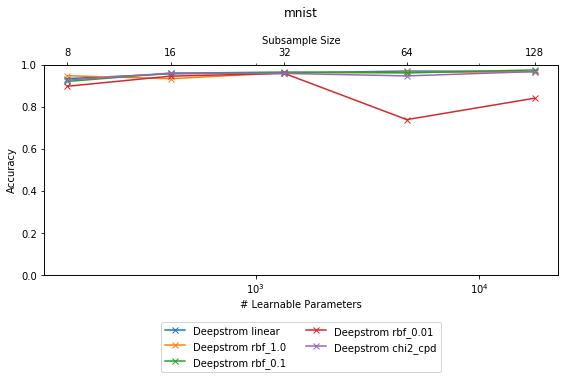

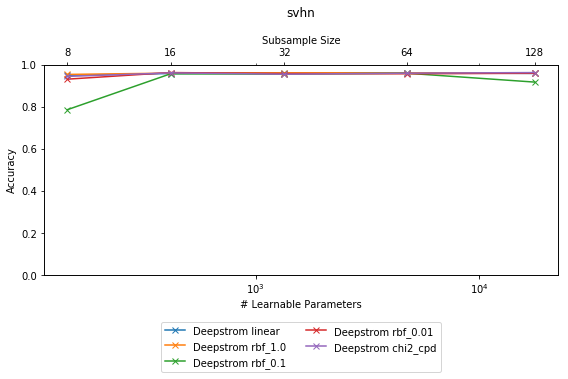

In [23]:
for DATANAME in datasets:
    df_data = df[df["dataset"] == DATANAME]
    nb_classes_dataset = nb_classes_datasets[DATANAME]
    nb_feature_conv = nb_feature_convs[DATANAME]
    f, ax = plt.subplots()
    for k_name in kernel_names:
        df_kernel = df_data[df_data["kernel"] == k_name]
        if k_name == "rbf":
            for g_val in gamma_values:
                k_name = "rbf" + "_" + str(g_val)
                df_rbf = df_kernel[df_kernel["--gamma"] == g_val]
                accuracies_kernel = df_rbf["test_acc"]
                subsample_sizes_kernel = df_rbf["--nys-size"].astype(int)
                np_param = (np.square(subsample_sizes_kernel) +  # m x m
                            subsample_sizes_kernel * nb_classes_dataset)  # m x c
                sorted_idx = np.argsort(np_param.values)
                xx = np_param.values[sorted_idx]
                print(accuracies_kernel.values[sorted_idx])
                yy = accuracies_kernel.values[sorted_idx].astype(float)
                ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")
        else:
            accuracies_kernel = df_kernel["test_acc"]
            subsample_sizes_kernel = df_kernel["--nys-size"].astype(int)
            np_param = (np.square(subsample_sizes_kernel) +  # m x m
                        subsample_sizes_kernel * nb_classes_dataset)  # m x c
            sorted_idx = np.argsort(np_param.values)
            xx = np_param.values[sorted_idx]
            print(accuracies_kernel.values[sorted_idx])
            yy = accuracies_kernel.values[sorted_idx].astype(float)
            ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")


    post_processing_figures(f, ax, np_param, subsample_sizes_kernel)